In [1]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, CandidateSteepestLocalSearchTSP

In [2]:
def pretty_print(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print('========================================================')

In [3]:
def experiments(node_path):
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')
    algorithms = {#'steepest_local_search_edges_random': LocalSearchTSP('steepest', node_path, 'edges', 'random'),
    'steepest_local_search_edges_random_candidate': CandidateSteepestLocalSearchTSP(node_path, k=10)}
    results = {}
    for key, algorithm in tqdm(algorithms.items()):
        result = algorithm.run_experiment()
        results[key] = result

    for key, result in results.items():
        values = result[:-2]
        pretty_print(key, values)

    for key, result in results.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████| 1/1 [01:14<00:00, 74.44s/it]

Algorithm: steepest_local_search_edges_random_candidate:
    objective: 67885.195(58380 - 77432)
    times: 0.379261816740036(0.26548290252685547 - 0.49312591552734375)


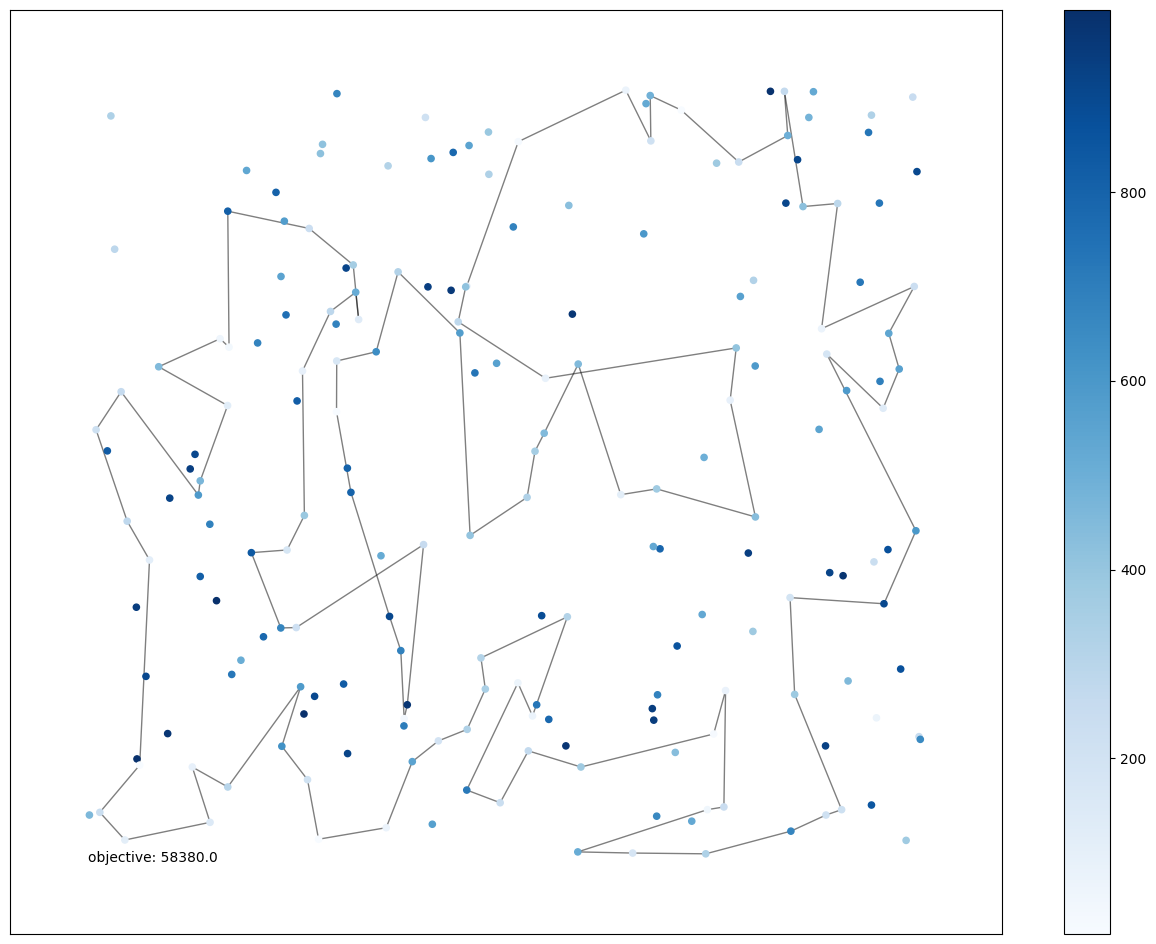

In [4]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C)

# Instance D

100%|██████████| 1/1 [01:15<00:00, 75.57s/it]

Algorithm: steepest_local_search_edges_random_candidate:
    objective: 65514.1(56237 - 83399)
    times: 0.38674378156661987(0.2889711856842041 - 0.5069501399993896)


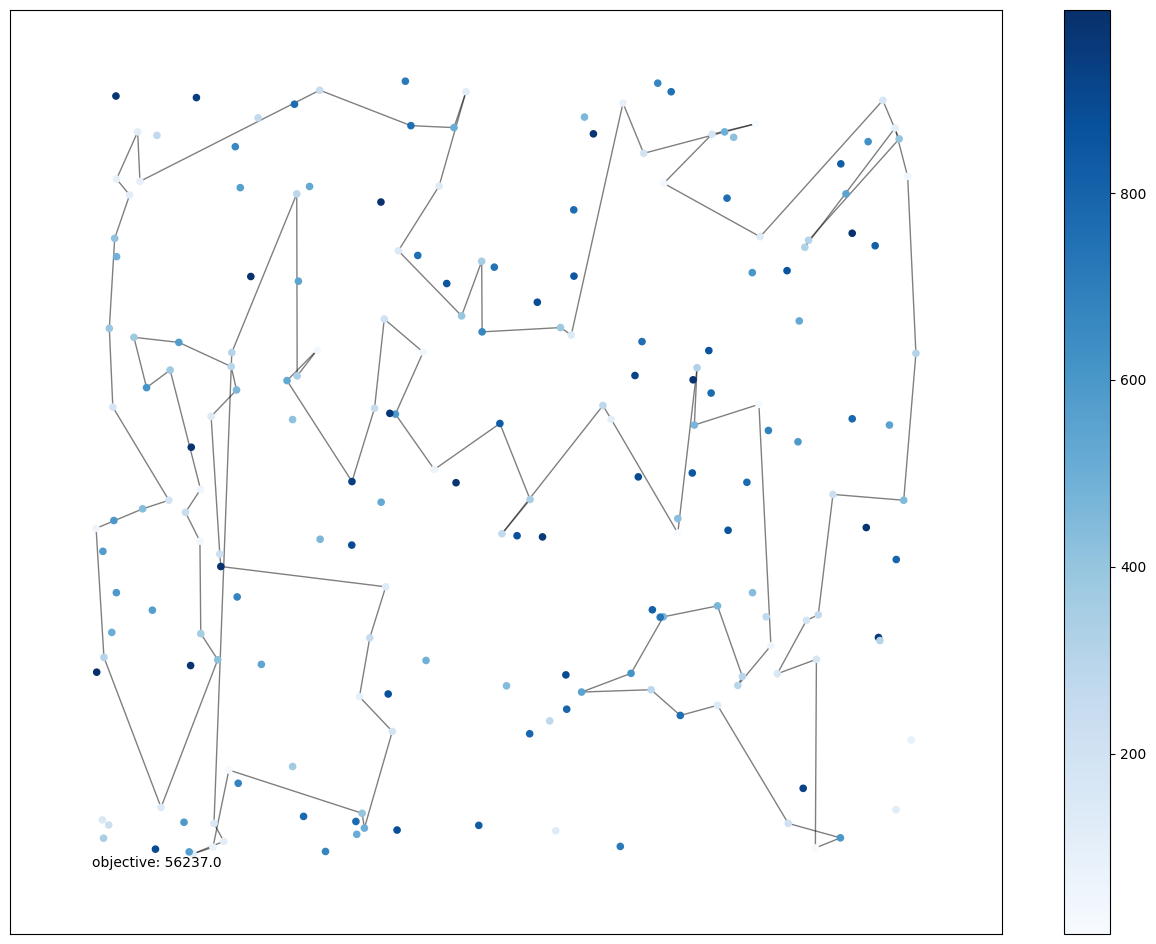

In [5]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D)